In [1]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

In [2]:
diamonds_test = pd.read_csv("diamonds_test.csv") # cargamos fichero
diamonds_test.head(5)                                   # visualizamos 5 primeras filas


,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.55,Very Good,E,SI2,59.6,57.0,5.34,5.39,3.20
1,1,0.35,Ideal,G,SI1,60.6,56.0,4.56,4.58,2.77
2,2,1.53,Good,H,IF,63.1,57.0,7.25,7.34,4.60
3,3,0.52,Ideal,E,VS1,61.8,56.0,5.17,5.19,3.20
4,4,0.54,Ideal,D,SI1,62.6,55.0,5.19,5.23,3.26


In [3]:

diamonds_train = pd.read_csv("diamonds_train.csv")

diamonds_train.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.43,Very Good,E,SI2,59.9,57.0,671,4.88,4.94,2.94
1,1.15,Good,H,SI1,60.2,61.0,5005,6.74,6.84,4.09
2,0.52,Ideal,E,VS2,61.3,56.0,1621,5.17,5.21,3.18
3,0.32,Ideal,G,VVS2,61.7,57.0,730,4.41,4.44,2.73
4,1.00,Premium,D,SI1,61.4,58.0,5880,6.43,6.37,3.93


In [4]:
diamonds_train.dtypes != 'object'

carat       True
cut        False
color      False
clarity    False
depth       True
table       True
price       True
x           True
y           True
z           True
dtype: bool

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_copy = diamonds_train

le.fit(data_copy['cut'])

data_copy['cut'] = le.transform(data_copy['cut'])

le.fit(data_copy['color'])

data_copy['color'] = le.transform(data_copy['color'])

le.fit(data_copy['clarity'])

data_copy['clarity'] = le.transform(data_copy['clarity'])

data_copy.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.43,4,1,3,59.9,57.0,671,4.88,4.94,2.94
1,1.15,1,4,2,60.2,61.0,5005,6.74,6.84,4.09
2,0.52,2,1,5,61.3,56.0,1621,5.17,5.21,3.18
3,0.32,2,3,7,61.7,57.0,730,4.41,4.44,2.73
4,1.00,3,0,2,61.4,58.0,5880,6.43,6.37,3.93


In [7]:
data_copy.dtypes != 'object'

carat      True
cut        True
color      True
clarity    True
depth      True
table      True
price      True
x          True
y          True
z          True
dtype: bool

In [9]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,43152.0,0.799810,0.474396,0.2,0.40,0.70,1.04,5.01
cut,43152.0,2.554551,1.029963,0.0,2.00,2.00,3.00,4.00
color,43152.0,2.599068,1.704806,0.0,1.00,3.00,4.00,6.00
clarity,43152.0,3.830854,1.723785,0.0,2.00,4.00,5.00,7.00
depth,43152.0,61.752361,1.439128,43.0,61.00,61.80,62.50,79.00
table,43152.0,57.462706,2.229668,43.0,56.00,57.00,59.00,76.00
price,43152.0,3942.483384,3990.866274,326.0,954.00,2421.00,5335.00,18823.00
x,43152.0,5.735674,1.121841,0.0,4.72,5.70,6.54,10.74
y,43152.0,5.739552,1.149528,0.0,4.73,5.71,6.54,58.90
z,43152.0,3.541920,0.708278,0.0,2.91,3.53,4.04,31.80


Pasamos a analizar la correlacion entre variables

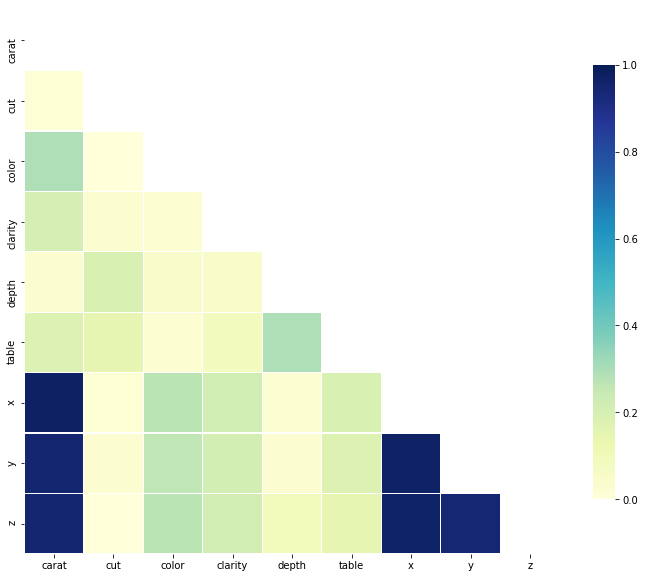

In [13]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data_copy.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Vemos como X-Caracter , X-Y, y-Z comparten una fuerte correlacion por tanto vamos a eliminar X,Y,Z

In [15]:
data_copy.corr() # matriz de correlación

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017271,0.294294,-0.210476,0.027871,0.181259,0.921776,0.974838,0.946150,0.949220
cut,0.017271,1.000000,0.002578,0.029913,-0.193748,0.148879,0.041313,0.022503,0.027724,0.002821
color,0.294294,0.002578,1.000000,-0.026792,0.047012,0.024178,0.175640,0.272849,0.264690,0.269612
clarity,-0.210476,0.029913,-0.026792,1.000000,-0.051781,-0.089803,-0.067741,-0.220850,-0.211791,-0.218680
depth,0.027871,-0.193748,0.047012,-0.051781,1.000000,-0.294847,-0.013078,-0.025326,-0.029666,0.094857
table,0.181259,0.148879,0.024178,-0.089803,-0.294847,1.000000,0.127091,0.194938,0.181993,0.149825
price,0.921776,0.041313,0.175640,-0.067741,-0.013078,0.127091,1.000000,0.884739,0.860887,0.857613
x,0.974838,0.022503,0.272849,-0.220850,-0.025326,0.194938,0.884739,1.000000,0.968965,0.966990
y,0.946150,0.027724,0.264690,-0.211791,-0.029666,0.181993,0.860887,0.968965,1.000000,0.943961
z,0.949220,0.002821,0.269612,-0.218680,0.094857,0.149825,0.857613,0.966990,0.943961,1.000000


In [16]:
data_copy_clean = data_copy
data_copy_clean = data_copy_clean.drop(['x','y','z'],axis=1)

In [17]:
data_copy_clean.corr()

,carat,cut,color,clarity,depth,table,price
carat,1.000000,0.017271,0.294294,-0.210476,0.027871,0.181259,0.921776
cut,0.017271,1.000000,0.002578,0.029913,-0.193748,0.148879,0.041313
color,0.294294,0.002578,1.000000,-0.026792,0.047012,0.024178,0.175640
clarity,-0.210476,0.029913,-0.026792,1.000000,-0.051781,-0.089803,-0.067741
depth,0.027871,-0.193748,0.047012,-0.051781,1.000000,-0.294847,-0.013078
table,0.181259,0.148879,0.024178,-0.089803,-0.294847,1.000000,0.127091
price,0.921776,0.041313,0.175640,-0.067741,-0.013078,0.127091,1.000000


In [18]:
data_copy_clean.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
dtype: bool

Una vez tenemos los datos limpios y hemos hecho un análisis exploratorio pasemos a analizar el mejor conjunto de características para poder entrenar nuestro modelo

C:\Users\alberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\alberto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alberto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


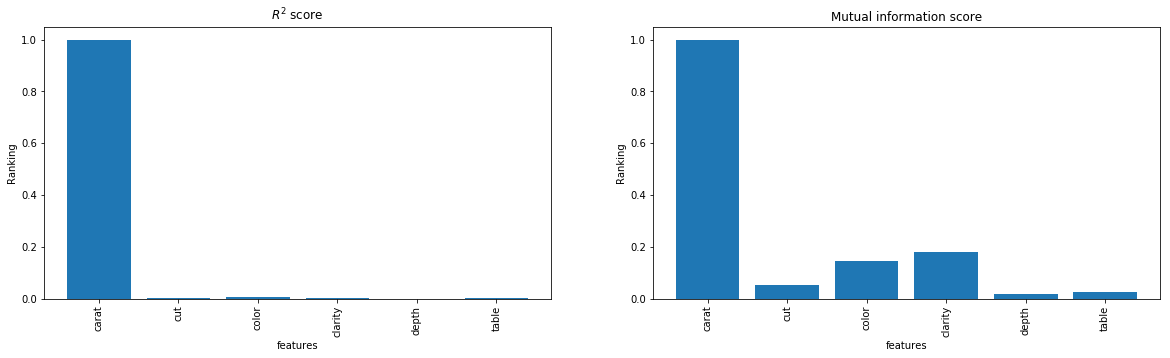

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# convertimos el DataFrame al formato necesario para scikit-learn
data = data_copy_clean.as_matrix() 

y = data[:,6:7]     # nos quedamos con la columna price
X = data[:,0:6]      # nos quedamos con el resto

feature_names = data_copy_clean.columns[0:6]


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Vemos como carat clarity y color parecen las variables mas importantes

A partir de ahora analizaremos la matriz de confunsion en diferentes modelos con algoritmos de machine learning y miraremos las métricas cual es la que mejor se ajusta

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [ ]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# preparamos los datos
data_copy_clean_2 = data_copy_clean

columns_to_drop = ['price']
features = data_copy_clean_2.columns.drop(columns_to_drop)

X = data_copy_clean_2[features].values
y = data_copy_clean_2['price'].values


# PASO 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, shuffle= True, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.